<a href="https://colab.research.google.com/github/Chanura04/ML-Coursework/blob/main/20240955.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [67]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix
)
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, auc


## Load the dataset

In [68]:
url_x = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_01/X.csv"
url_y = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_01/y_data.csv"

## Check dataset behaviour

In [69]:
X=pd.read_csv(url_x)
y=pd.read_csv(url_y)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,0,1,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,0,1,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,0,1,0,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [70]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [71]:
X.shape

(7043, 25)

In [72]:
y.shape

(7043, 1)

### Split Data into Training, Validation, and Test Sets

In [73]:

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

y_train = y_train.squeeze()    
y_test  = y_test.squeeze()

Shape of X_train: (5634, 25)
Shape of y_train: (5634, 1)
Shape of X_test: (1409, 25)
Shape of y_test: (1409, 1)


Text(0.5, 1.0, 'Count Plot for Churn')

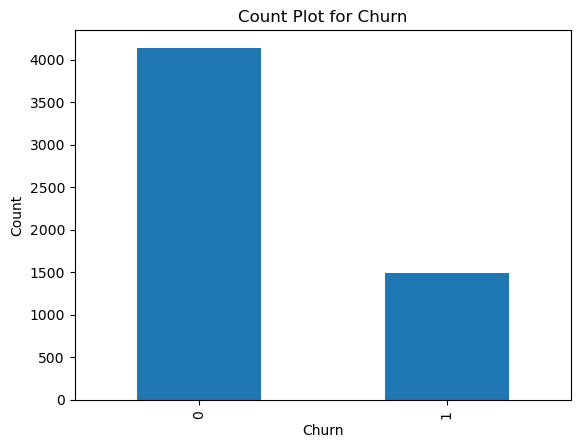

In [74]:
count=y_train.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

## Decision Tree Traininig

#### Test 01

In [75]:
dt_model = DecisionTreeClassifier(random_state=42)

# Train model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [76]:
y_pred = dt_model.predict(X_test)


In [77]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[836, 199],
       [188, 186]])

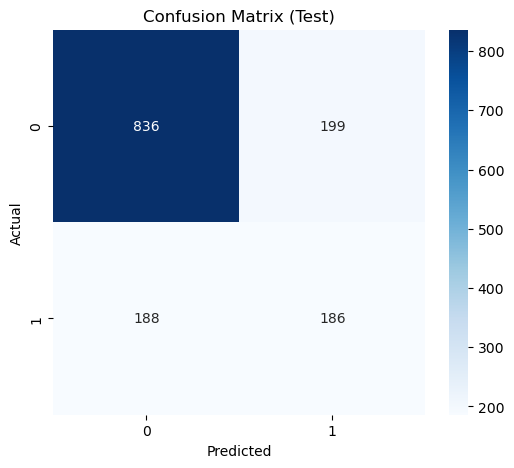

In [78]:

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [79]:
y_pred_proba_deci_1 = dt_model.predict(X_test).ravel()
y_pred_deci_1 = (y_pred_proba_deci_1 >= 0.5).astype(int)
print("Test AUC:", roc_auc_score(y_test, y_pred_proba_deci_1))
print("Test Accuracy:", accuracy_score(y_test, y_pred_deci_1))
print(classification_report(y_test, y_pred_deci_1))

Test AUC: 0.6525278359037949
Test Accuracy: 0.7253371185237757
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.48      0.50      0.49       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



#### Test 02

In [82]:
optimal_dt = DecisionTreeClassifier(
    criterion='entropy',           # Faster, good impurity
    splitter='best',            # Exhaustive search per node
    max_depth=6,               # captures interactions
    min_samples_split=10,        
    min_samples_leaf=15,        
    max_features='sqrt',        # Reduce overfitting
    class_weight='balanced',    # Handle class imbalance
    random_state=42,
    ccp_alpha=0.0005,           # Cost complexity pruning
    min_impurity_decrease=0.001  # Extra regularization
)


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    optimal_dt,
    X_train,
    y_train,
    cv=kfold,
    scoring='accuracy'
)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Fit the model
optimal_dt.fit(X_train, y_train)

y_train_pred = optimal_dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

y_proba = optimal_dt.predict_proba(X_test)[:, 1]
optimal_threshold = 0.629
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)
precision_training=precision_score(y_train, y_train_pred)
recall_training=recall_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_pred_optimal)
recall_test = recall_score(y_test, y_pred_optimal)
train_auc=roc_auc_score(y_train, optimal_dt.predict_proba(X_train)[:, 1])
test_auc=roc_auc_score(y_test, y_proba)
print("Training Precision:", precision_training)
print("Training Recall:", recall_training)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Training AUC:", train_auc)

test_accuracy = accuracy_score(y_test, y_pred_optimal)
print("Test Accuracy:", test_accuracy)

print("Test AUC:", roc_auc_score(y_test, y_proba))
print("Classification Report:")
print(classification_report(y_test, y_pred_optimal))


Cross-Validation Accuracy Scores: [0.73824312 0.73380657 0.75066548 0.73380657 0.77886323]
Mean CV Accuracy: 0.7470769943624991
Training Accuracy: 0.7458288959886404
Training Precision: 0.5137254901960784
Training Recall: 0.788628762541806
Test Precision: 0.5710955710955711
Test Recall: 0.6550802139037433
Training AUC: 0.8375449775809031
Test Accuracy: 0.7778566359119943
Test AUC: 0.821182412358883
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.66      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



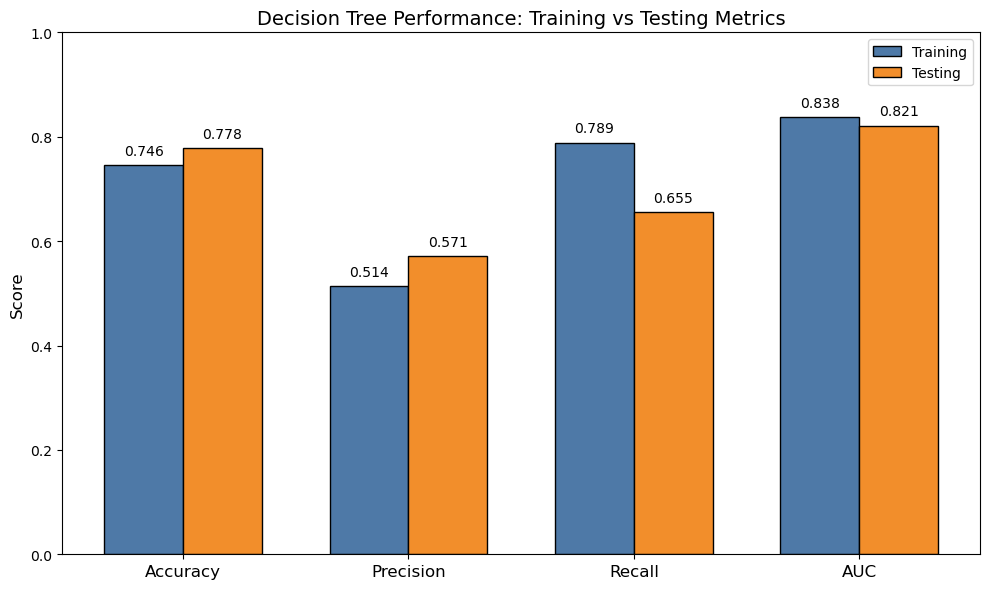

In [83]:
import numpy as np
import matplotlib.pyplot as plt

 
metrics = ['Accuracy', 'Precision', 'Recall', 'AUC']

train_values = [train_accuracy, precision_training, recall_training, train_auc]
test_values  = [test_accuracy, precision_test, recall_test, test_auc]

 
x = np.arange(len(metrics))
width = 0.35

 
plt.figure(figsize=(10,6))

plt.bar(x - width/2, train_values, width,
        label='Training', color='#4E79A7', edgecolor='black')     # navy blue

plt.bar(x + width/2, test_values, width,
        label='Testing', color='#F28E2B', edgecolor='black')      # orange

# --- Labels ---
plt.xticks(x, metrics, fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Decision Tree Performance: Training vs Testing Metrics", fontsize=14)
plt.ylim(0, 1)
plt.legend()

# --- Display values on bars ---
for i, v in enumerate(train_values):
    plt.text(i - width/2, v + 0.02, f"{v:.3f}", ha='center')

for i, v in enumerate(test_values):
    plt.text(i + width/2, v + 0.02, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()


Text(0.5, 25.722222222222214, 'Predicted')

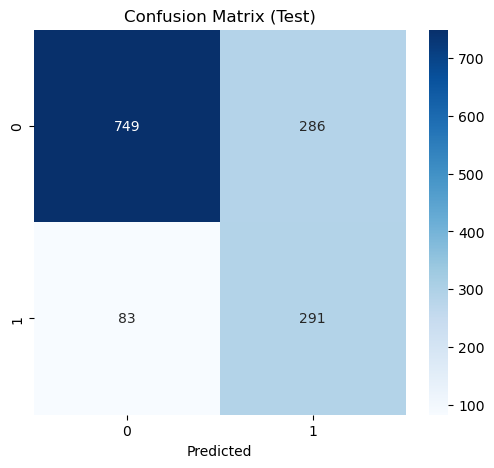

In [ ]:
cm = confusion_matrix(y_test, (optimal_dt.predict(X_test) >=optimal_threshold).astype(int))
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")

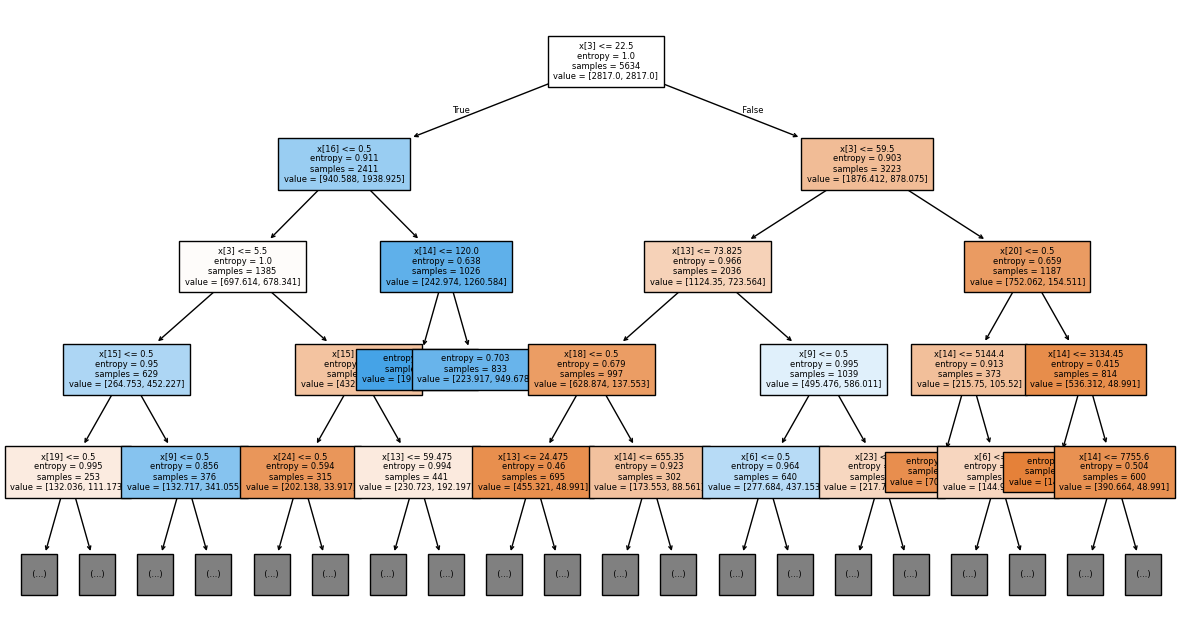

In [ ]:
from sklearn import tree
plt.figure(figsize=(15, 8))
tree.plot_tree(optimal_dt, filled=True, fontsize=6, max_depth=4)
plt.show()


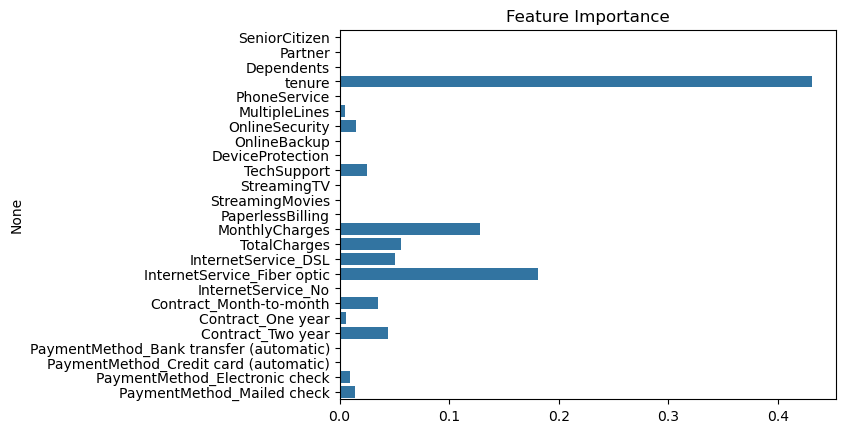

In [ ]:
importances = optimal_dt.feature_importances_
features = X_train.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

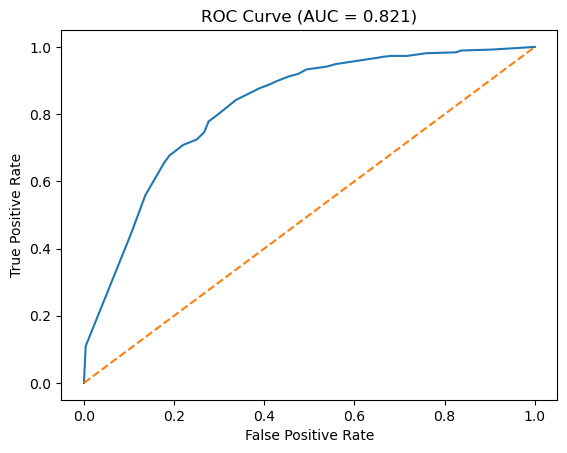

In [ ]:
fpr, tpr, _ = roc_curve(y_test  , y_proba )
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.show()